**Декомпозиция**

Шаг 1. Ознакомление с данными
- Откроем файл с данными и изучим общую информацию

Шаг 2. Выполним предобработку данных
- Посмотрим на кол-во пропусков
- Заполняем пропуски
- Приводим значения столбцов к нужному типу
- Зададим рамки исследуемого диапазона

Шаг 3. Добавим в таблицу новые столбцы

Шаг 4 Исследовательский анализ данных
- Изучим параметры объектов
- Изучим, как быстро продавались квартиры
- Найдем факторы, которые больше всего влияют на общую (полную) стоимость объекта
- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Вычислим среднюю цену каждого километра

Шаг 4. Выводы




#### Ознакомление с данными
##### Откроем файл с данными и изучим общую информацию

In [1]:
# Импортируем библиотеки и прочитаем файл
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "png"

# Прочитаем файл
try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('practicum_datasets/real_estate_data.csv', sep='\t')

# Задаем параметры
pd.set_option('display.max_columns', 50)

In [2]:
# Выводим первые 5 строк датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:**
- в датасете 23699 строк
- пропуски в столбцах:
 - ceiling_height
 - floors_total
 - living_area
 - is_apartment 
 - kitchen_area
 - balcony
 - locality_name
 - airports_nearest
 - cityCenters_nearest
 - parks_around3000
 - parks_nearest
 - ponds_around3000
 - ponds_nearest


#### Выполним предобработку данных

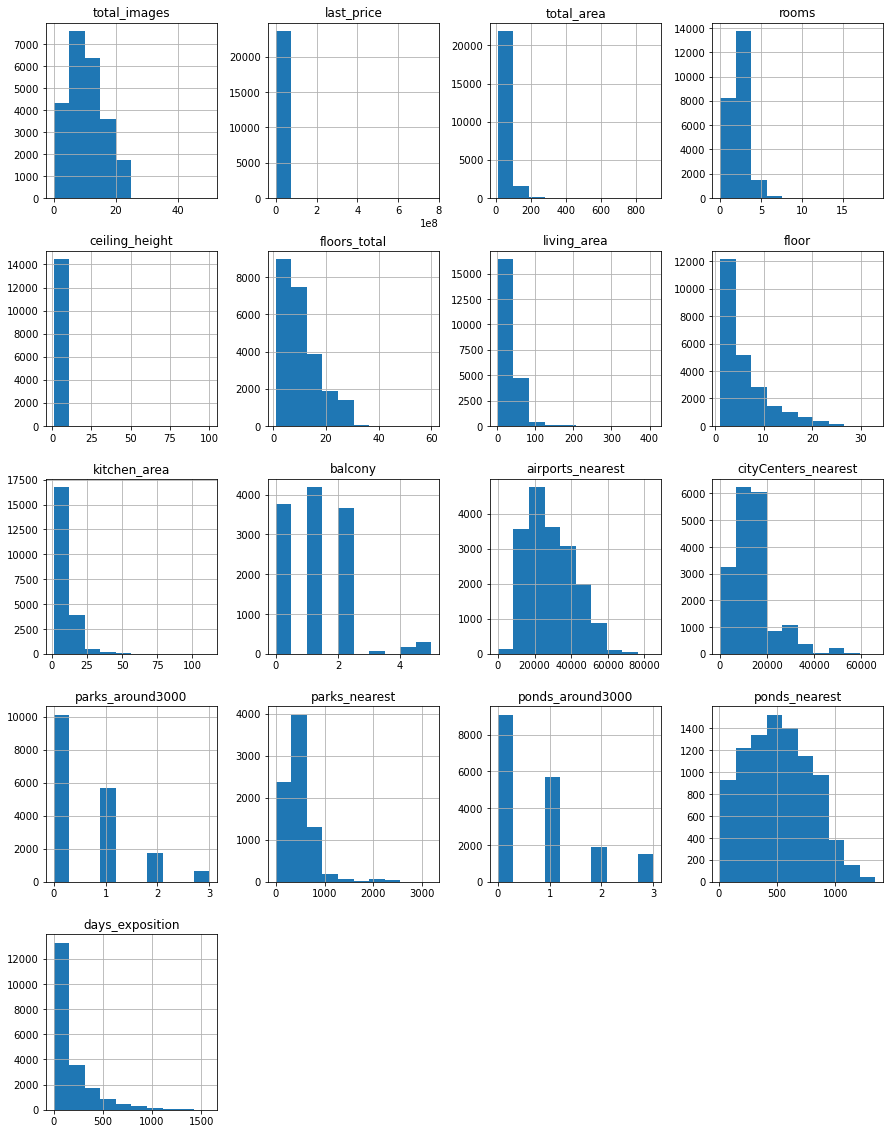

In [4]:
# Построим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20))
plt.show()

##### Посмотрим на кол-во пропусков

In [5]:
# Посмотрим информацию о пропусках в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


##### Заполняем пропуски

In [6]:
# Обработаем столбцы в которых возможно заменить пропуски:
data['balcony'] = data['balcony'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

In [7]:
# Удалим строки с отсутствующими пунктами и уберем ненужные названия
data['locality_name'] = data['locality_name'].astype(str)
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex = True)

drop_words = ['поселок', 'городской', 'городского', 'типа', 'село', 'деревня', 'садовое', 'товарищество', 'коттеджный', 'станции']
for word in drop_words:
    data['locality_name'] = data['locality_name'].replace(word, '', regex = True)
    
#data['locality_name'].unique()
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name              0
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [8]:
# Заполним пропуски этажей медианным значением
m_floor = data.groupby('locality_name')['floors_total'].median()

for value in data['locality_name'].unique():
    data.loc[(data['locality_name'] == value), 'floors_total'] = \
    data.loc[(data['locality_name'] == value), 'floors_total'].fillna(m_floor[value])

# Заполним пропуски высоты потолков медианным значением
m_height = data.groupby('floors_total')['ceiling_height'].median()

for value in data['floors_total'].unique():
    data.loc[(data['floors_total'] == value), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == value), 'ceiling_height'].fillna(m_height[value])

# Заполним пропуски жилой площади медианным значением
m_area = data.groupby('total_area')['living_area'].median()

for value in data['total_area'].unique():
    data.loc[(data['total_area'] == value), 'living_area'] = \
    data.loc[(data['total_area'] == value), 'living_area'].fillna(m_area[value])


# Заполним пропуски площади кухни медианным значением
mk_area = data.groupby('rooms')['kitchen_area'].median()

for value in data['rooms'].unique():
    data.loc[(data['rooms'] == value), 'kitchen_area'] = \
    data.loc[(data['rooms'] == value), 'kitchen_area'].fillna(mk_area[value])
# Комнаты со значением 0 являются студиями и их площадь кухни равна площади в 1-2 комнатных квартирах
for rooms in data['rooms'].unique():
    data.loc[(data['rooms'] == 0), 'kitchen_area'] = data.loc[(data['rooms'] == 0), 'kitchen_area'].fillna(9)

# Заполним пропуски этажей медианным значением
m_floor = data.groupby('locality_name')['floors_total'].median()

for value in data['locality_name'].unique():
    data.loc[(data['locality_name'] == value), 'floors_total'] = \
    data.loc[(data['locality_name'] == value), 'floors_total'].fillna(m_floor[value])

# Заполним пропуски расстояния до ближайшего аэропорта медианным значением
m_air = data.groupby('locality_name')['airports_nearest'].median()

for value in data['locality_name'].unique():
    data.loc[(data['locality_name'] == value), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == value), 'airports_nearest'].fillna(m_air[value])
    
# Заполним пропуски расстояния до ближайшего аэропорта медианным значением
m_cc = data.groupby('locality_name')['cityCenters_nearest'].median()

for value in data['locality_name'].unique():
    data.loc[(data['locality_name'] == value), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == value), 'cityCenters_nearest'].fillna(m_cc[value])

In [9]:
# Уберем одну строку с пропуском в стобце 'ceiling_height' и переименнуем стобцы 
data = data.dropna(subset = ['ceiling_height']).reset_index(drop=True)

# Заполним жилую площадь медианой
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()

data = data.rename(columns={'cityCenters_nearest': 'city_center_nearest', \
                            'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4863
city_center_nearest     4863
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [10]:
# Заменим пропущенные значения на маркер, для столбцов 'airports_nearest' и 'city_center_nearest'

# Для столбца airports_nearest
data['airports_nearest'] = data['airports_nearest'].fillna(100000)
# Для столбца city_center_nearest
data['city_center_nearest'] = data['city_center_nearest'].fillna(80000)

# Создадим дополнительный столбец для days_exposition с булевыми значениями Продано или В Продаже. Заменим отсутствующие значение на 0
data['sold'] = data['days_exposition'].isna()
data['days_exposition'] = data['days_exposition'].fillna(0)

- Заполнили пропуски во всех столбцах
- Отсутствие значений могло появить в связи с разными характеристиками объектов недвижимости. Например, если поблизости отсутствуют парки/сады по умолчанию, то мог сработать человеческий фактор и значения просто не заполнялись.

In [11]:
# Выведем информацию о типах данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           23698 non-null  float64
 8   floor                 23698 non-null  int64  
 9   is_apartment          23698 non-null  bool   
 10  studio                23698 non-null  bool   
 11  open_plan             23698 non-null  bool   
 12  kitchen_area          23698 non-null  float64
 13  balcony               23698 non-null  float64
 14  locality_name         23698 non-null  object 
 15  airports_nearest   

In [12]:
# Приводим значения столбцов к нужному типу
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int)
data['city_center_nearest'] = data['city_center_nearest'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

Заменили тип данных в столбцах:
- first_day_exposition
- floors_total
- balcony
- parks_nearest
- parks_around_3000
- ponds_nearest
- ponds_around_3000
- airports_nearest
- city_center_nearest
- days_exposition

##### Зададим рамки исследуемого диапазона

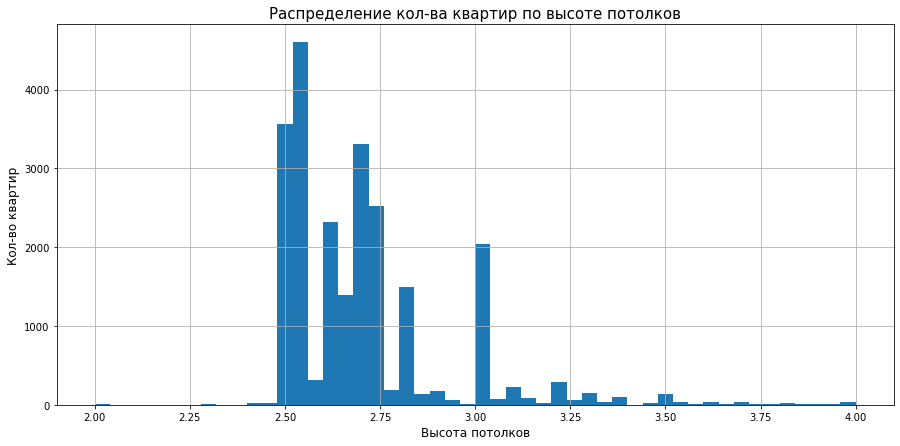

In [13]:
# Создадим отфильтрованный датасет и запишем туда новые условия по высоте потолков
df = data.query('2.25 <= ceiling_height <= 3.1')
data['ceiling_height'].hist(bins=50, range=(2, 4), figsize=(15, 7))
plt.title('Распределение кол-ва квартир по высоте потолков', fontsize = 15)
plt.xlabel('Высота потолков', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Высота потолков от 2.25 до 3.1

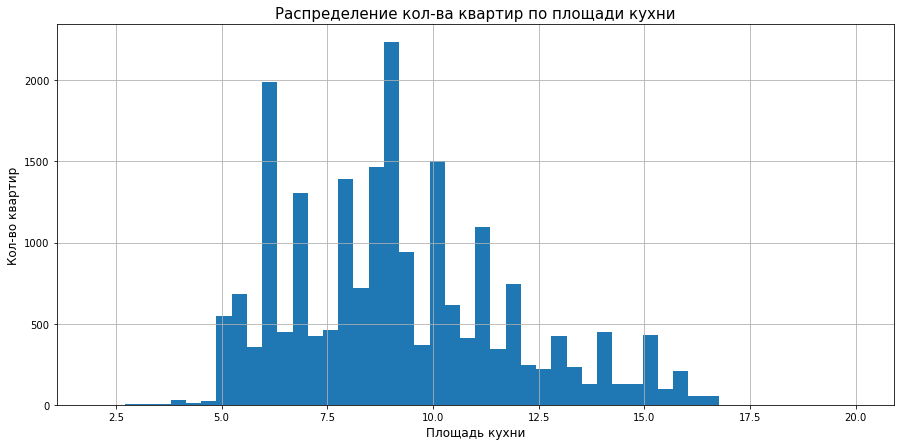

In [14]:
# Создадим отфильтрованный датасет и запишем туда новые условия по площади кухни
df = df.query('2.2 <= kitchen_area <= 16.5')
df['kitchen_area'].hist(bins=50, range=(2, 20), figsize=(15, 7))
plt.title('Распределение кол-ва квартир по площади кухни', fontsize = 15)
plt.xlabel('Площадь кухни', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Площадь кухни от 2.2 до 16.5

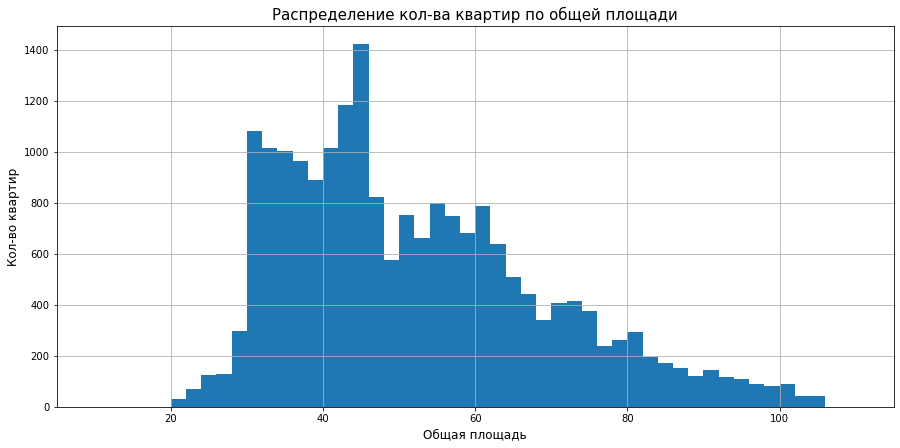

In [15]:
# Создадим отфильтрованный датасет и запишем туда новые условия по общей площади
df = df.query('20 <= total_area <= 105')
df['total_area'].hist(bins=50, range=(10, 110), figsize=(15, 7))
plt.title('Распределение кол-ва квартир по общей площади', fontsize = 15)
plt.xlabel('Общая площадь', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Общая площадь от 20 до 105

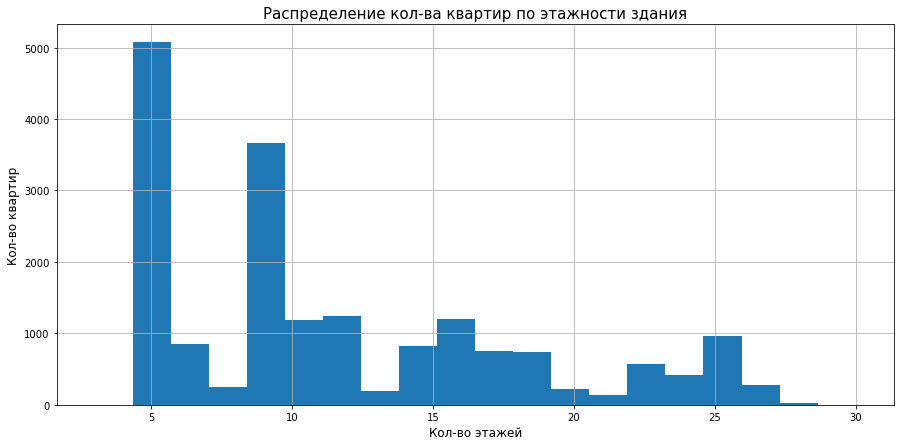

In [16]:
# Создадим отфильтрованный датасет и запишем туда новые условия по этажности
df = df.query('5 <= floors_total <= 28')
df['floors_total'].hist(bins=20, range=(3, 30), figsize=(15, 7))
plt.title('Распределение кол-ва квартир по этажности здания', fontsize = 15)
plt.xlabel('Кол-во этажей', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Этажность здания от 5 до 28

**Вывод:**
В рамках разброса устранили аномально большие и малые значения. Высота потолков, площадь кухни, площадь квартиры и общее количество этажей имели большой разброс в связи с ошибками в данных. Все скорректированные значения перезаписали в новый датафрейм.

#### Добавим в таблицу новые столбцы

In [17]:
# Цена одного квадратного метра
df['price_area'] = df['last_price'] / df['total_area']

In [18]:
# День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
df['weekday'] = df['first_day_exposition'].dt.weekday

In [19]:
# Месяц публикации объявления
df['month'] = df['first_day_exposition'].dt.month

In [20]:
# Год публикации объявления
df['year'] = df['first_day_exposition'].dt.year

In [21]:
# Тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else: 
        return 'другой'

df['floor_type'] = df.apply(floor_type, axis=1)

In [22]:
# Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
df['center_km'] = df['city_center_nearest'] / 1000

**Вывод:** Добавлены следующие столбцы:
- price_area (Цена одного квадратного метра)
- weekday (День недели публикации объявления)
- month (Месяц публикации объявления)
- year (Год публикации объявления)
- floor_type (Тип этажа квартиры)
- center_km (Расстояние до центра города)

#### Исследовательский анализ данных
##### Изучим параметры объектов

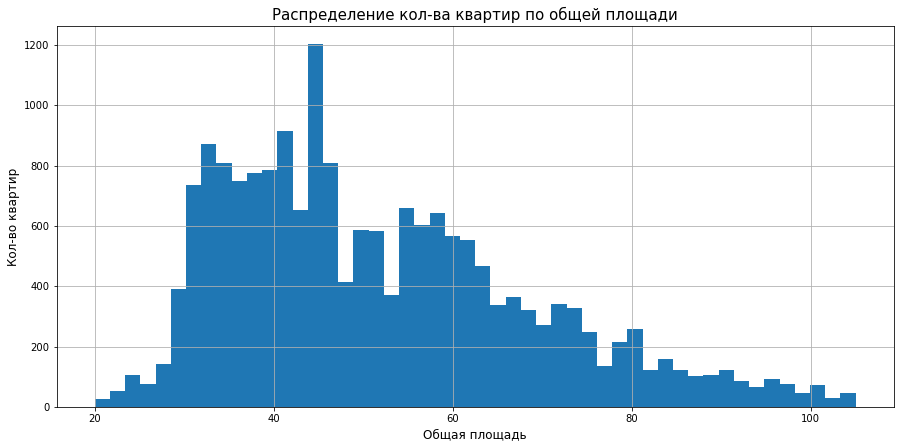

In [23]:
# Общая площадь
df['total_area'].hist(bins=50, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по общей площади', fontsize = 15)
plt.xlabel('Общая площадь', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Мы видим пик значений от 25 до 45 м2. 
Можно сделать вывод, что чаще всего встречаются квартиры студии и 1-2 комнатные.

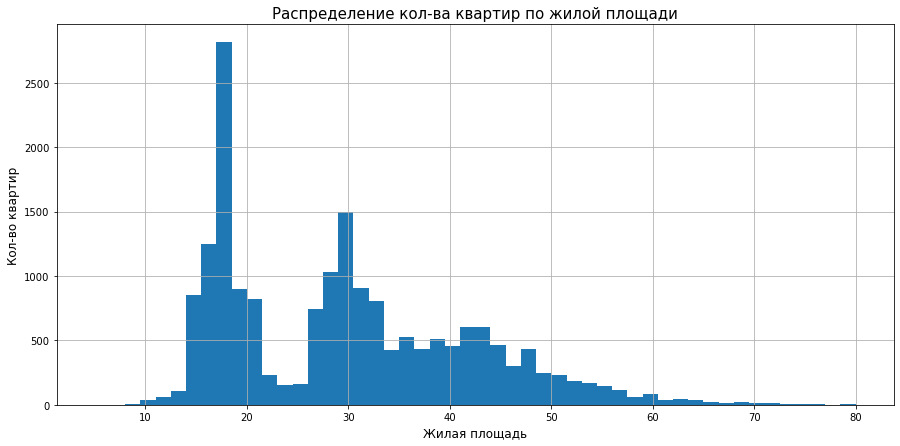

In [24]:
# Жилая площадь
df['living_area'].hist(bins=50, range=(5, 80), figsize=(15, 7))
plt.title('Распределение кол-ва квартир по жилой площади', fontsize = 15)
plt.xlabel('Жилая площадь', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

В жилой площади видим два пика: от 15 до 20 м2 и от 25 до 35 м2. Можем предположить что это типовые варианты квартир.

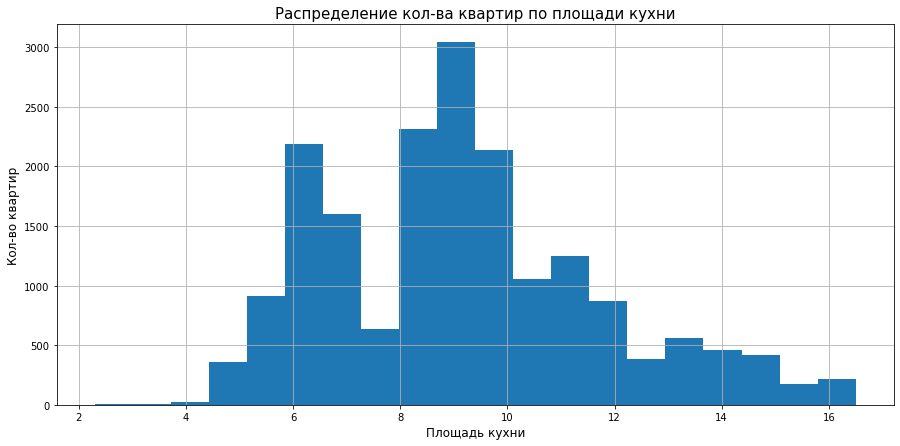

In [25]:
# Площадь кухни
df['kitchen_area'].hist(bins=20, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по площади кухни', fontsize = 15)
plt.xlabel('Площадь кухни', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Аналогично видим 2 пика в значениях площади кухни. 4-7 м2 и 8-10 м2. Скорее всего - типовые варианты.

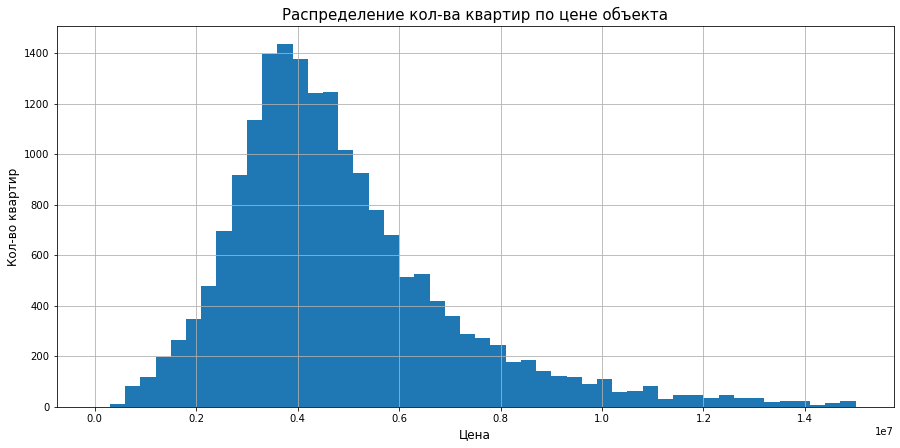

In [26]:
# Цена объекта
df['last_price'].hist(bins=50, range=(0, 15000000), figsize=(15, 7))
plt.title('Распределение кол-ва квартир по цене объекта', fontsize = 15)
plt.xlabel('Цена', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Пик наблюдается в диапазоне от 3 до 5 млн рублей. Это самые ходовые квартиры по стоимости.

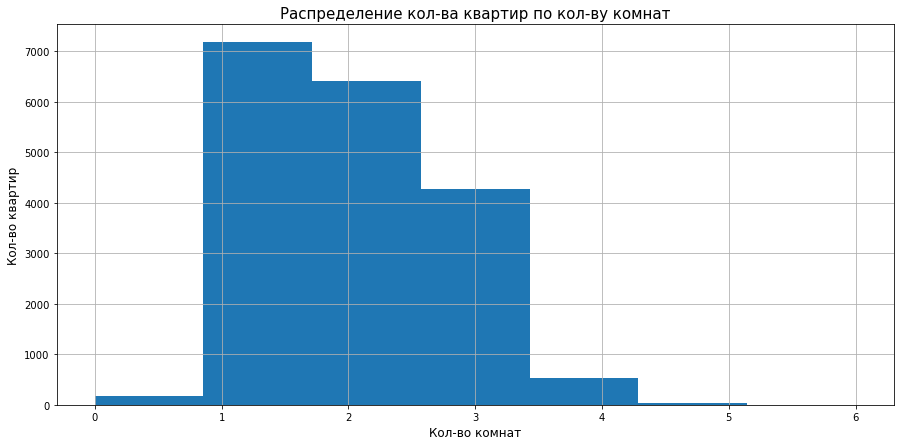

In [27]:
# Количество комнат
df['rooms'].hist(bins=7, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по кол-ву комнат', fontsize = 15)
plt.xlabel('Кол-во комнат', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

По количеству комнат видим самые распространенные - 1-2 комнатные.

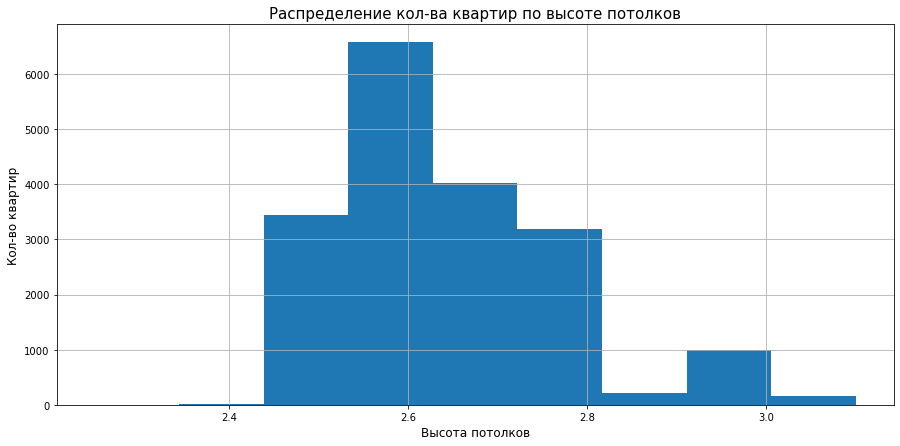

In [28]:
# Высота потолков
df['ceiling_height'].hist(bins=9, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по высоте потолков', fontsize = 15)
plt.xlabel('Высота потолков', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

2.4 - 2.8 самая распространенная высота потолка, так же видим небольшой всплеск на 3м, скорее всего это бизнес и элит класс.

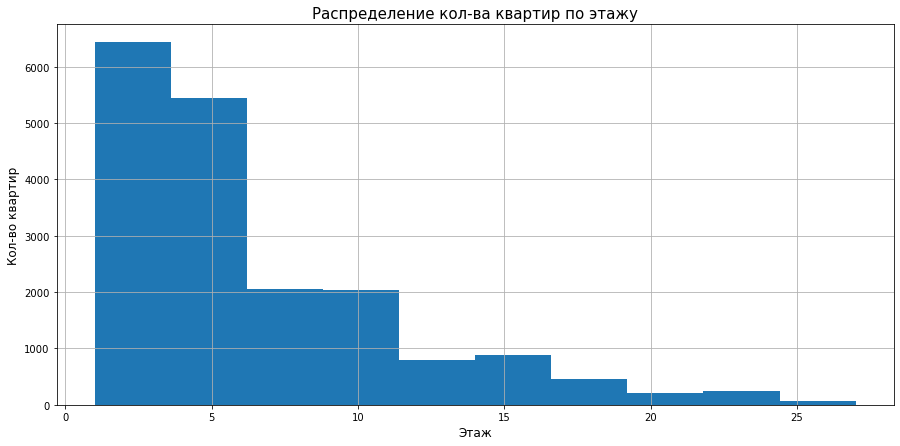

In [29]:
# Этаж квартиры
df['floor'].hist(bins=10, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по этажу', fontsize = 15)
plt.xlabel('Этаж', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Самые распространенные этажи - начиная снизу. Можно предположить что по мере увеличения этажа растет и цена.

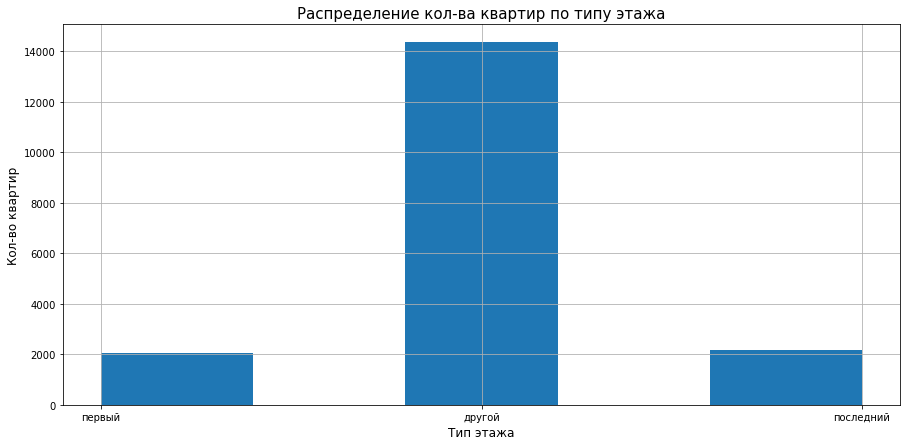

In [30]:
# Тип этажа квартиры («первый», «последний», «другой»)
df['floor_type'].hist(bins=5, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по типу этажа', fontsize = 15)
plt.xlabel('Тип этажа', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Кол-во первых и последних этажей примерно одинаково. 

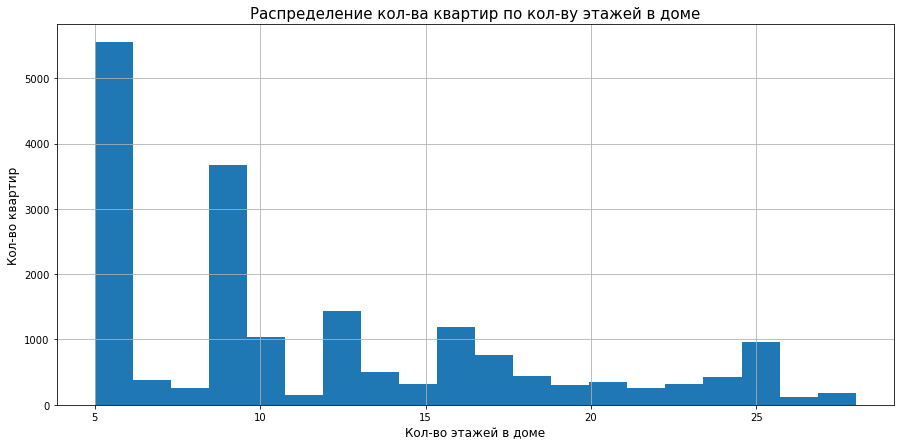

In [31]:
# Общее количество этажей в доме
df['floors_total'].hist(bins=20, figsize=(15, 7))
plt.title('Распределение кол-ва квартир по кол-ву этажей в доме', fontsize = 15)
plt.xlabel('Кол-во этажей в доме', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

На графике можно увидеть пики на 5, 9, 14 и 16 этажах. Это типовые застройки. Лидеры - 5-и этажки.

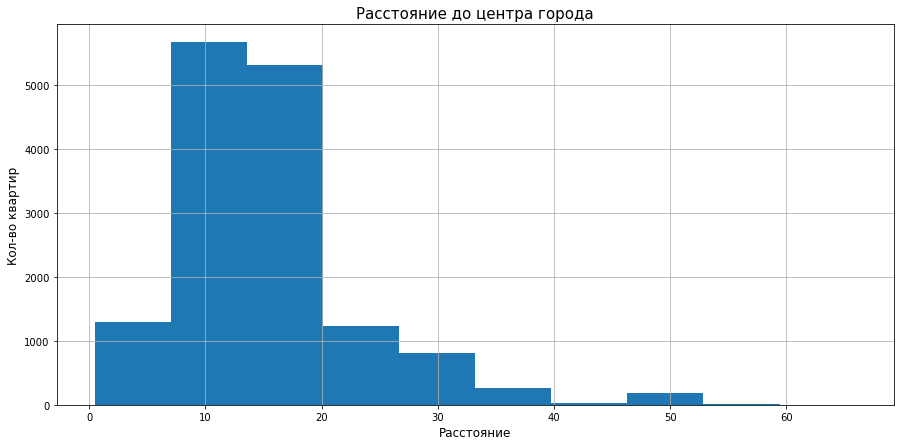

In [32]:
# Расстояние до центра города в метрах
df.query('center_km != 80')['center_km'].hist(bins=10, figsize=(15, 7))
plt.title('Расстояние до центра города', fontsize = 15)
plt.xlabel('Расстояние', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Наиболее удобное заселенное место находится в диапазоне от 8 до 15 км от центра. 

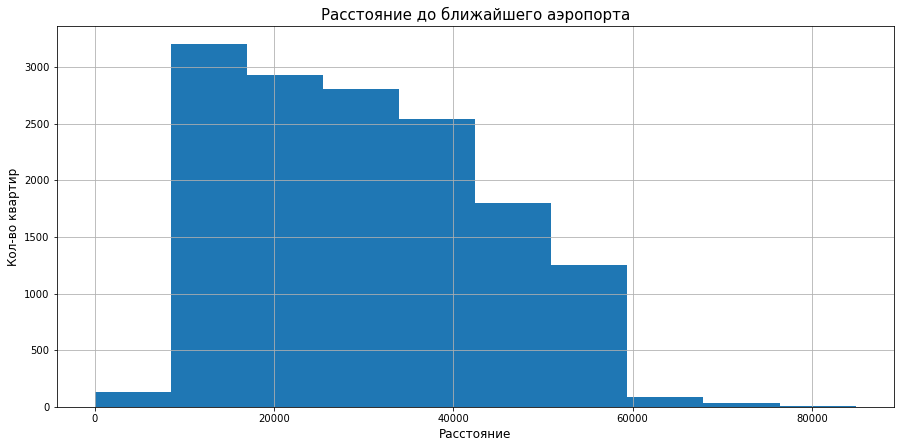

In [33]:
# Расстояние до ближайшего аэропорта
df.query('airports_nearest != 100000')['airports_nearest'].hist(bins=10, figsize=(15, 7))
plt.title('Расстояние до ближайшего аэропорта', fontsize = 15)
plt.xlabel('Расстояние', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Аэропорт находится около города, поэтому видим схожую ситуацию. Можно заметить второй пик около 40 км. Скорее всего это густонаселённая окраина СЗ и СВ Санкт-Петербурга.

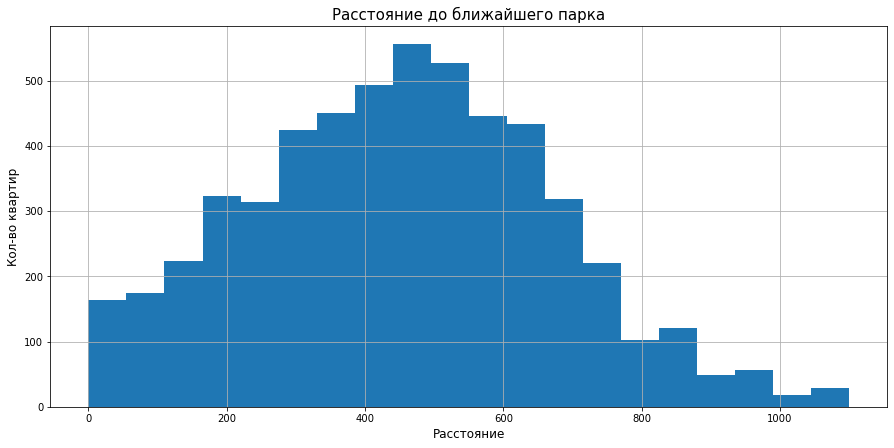

In [34]:
# Расстояние до ближайшего парка
df.query('parks_nearest != 0')['parks_nearest'].hist(bins=20, range=(0, 1100), figsize=(15, 7))
plt.title('Расстояние до ближайшего парка', fontsize = 15)
plt.xlabel('Расстояние', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Как правило, парки раскиданы по всему городу, и средняя удаленность вышла в диапазоне от 400 до 600 м2.

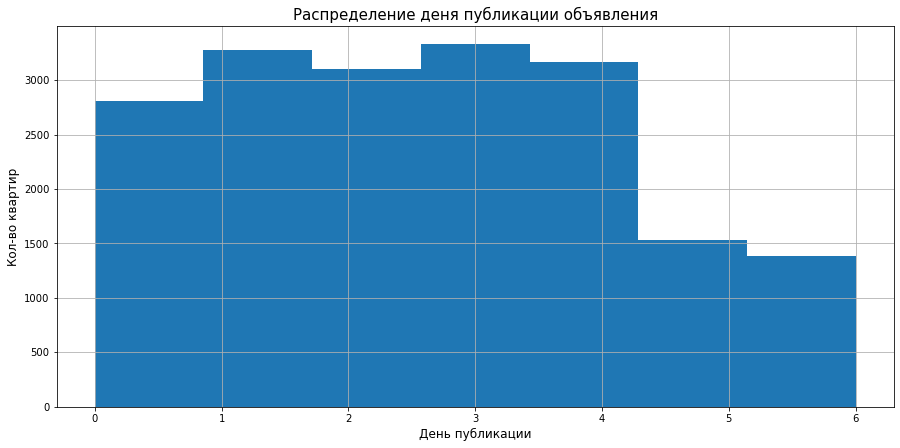

In [35]:
# День публикации объявления
df['weekday'].hist(bins=7, figsize=(15, 7))
plt.title('Распределение деня публикации объявления', fontsize = 15)
plt.xlabel('День публикации', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

пики продаж выходят на будние дни. Логично что на выходных риелторы больше отдыхают.

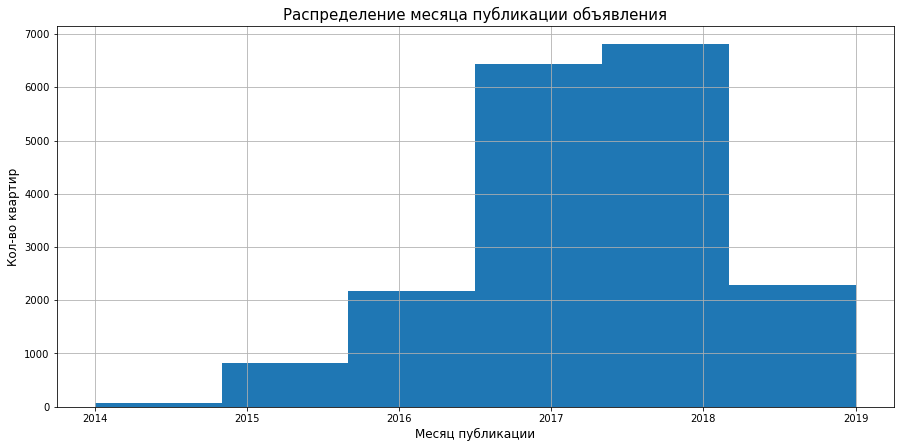

In [36]:
# Месяц публикации объявления
df['year'].hist(bins=6, figsize=(15, 7))
plt.title('Распределение месяца публикации объявления', fontsize = 15)
plt.xlabel('Месяц публикации', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

Пик продаж вышел на 2017 - 2018 гг. В 2019 сделки вернулись на уровень 2016 г.

##### Изучим, как быстро продавались квартиры

In [37]:
# Выводим первые 5 строк датасета
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sold,price_area,weekday,month,year,floor_type,center_km
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,Шушары,12817,18603,0,0,0,0,81,False,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,False,92785.714286,3,8,2015,другой,13.933
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,100000,80000,0,0,0,0,55,False,95065.789474,0,9,2018,другой,80.000
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,Парголово,52996,19143,0,0,0,0,155,False,99195.710456,3,11,2017,другой,19.143
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,Мурино,51553,21888,0,0,0,0,189,False,87454.764777,2,5,2018,другой,21.888


In [38]:
# Уберем значения равные 0, которыми заполняли пропуски объявлений, которые еще не проданы
days = df.query('days_exposition != 0')

In [39]:
# Найдем среднее
days['days_exposition'].mean()

167.94155606964569

In [40]:
# Найдем медиану
days['days_exposition'].median()

89.0

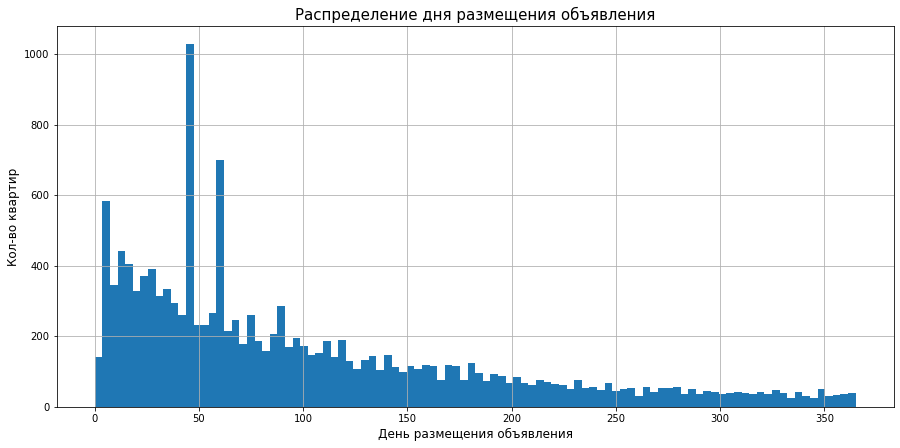

In [41]:
# Строим распределение
days['days_exposition'].hist(bins=100, range=(0, 365), figsize=(15, 7))
plt.title('Распределение дня размещения объявления', fontsize = 15)
plt.xlabel('День размещения объявления', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)
plt.show()

**Вывод:** В целом мы видим нисходящую тенденцию по времени. Продажи до 3 месяцев можно считать быстрыми, а продажи более - долгими. Скорее всего первыми уходят типовые квартиры, более 3 месяцев продаются квартиры с нестандартной планировкой.

##### Найдем факторы, которые больше всего влияют на общую (полную) стоимость объекта

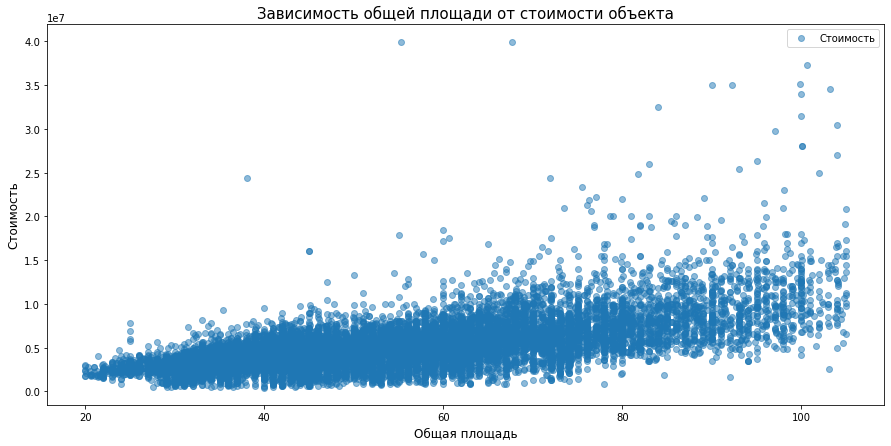

In [42]:
# Найдем зависимость общей площади
df.plot(x='total_area', y='last_price', style='o', alpha=0.5, figsize=(15, 7), label="Стоимость")
plt.title('Зависимость общей площади от стоимости объекта', fontsize = 15)
plt.xlabel('Общая площадь', fontsize = 12)
plt.ylabel('Стоимость', fontsize = 12)
plt.show()

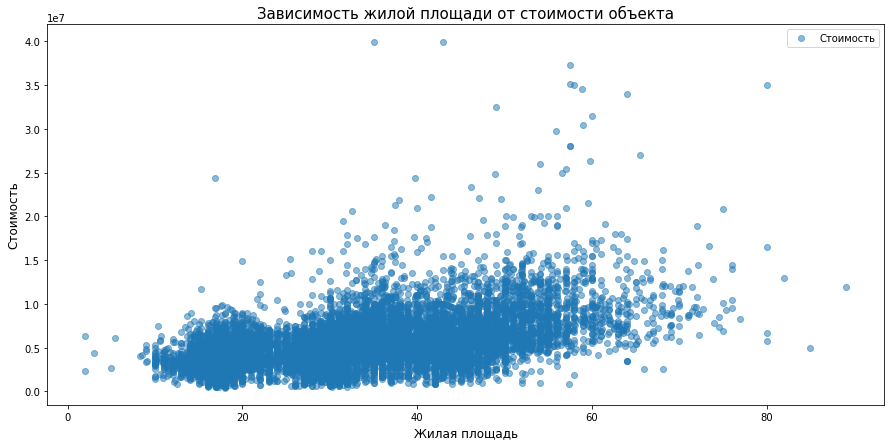

In [43]:
# Найдем зависимость жилой площади
df.plot(x='living_area', y='last_price', style='o', alpha=0.5, figsize=(15, 7), label="Стоимость")
plt.title('Зависимость жилой площади от стоимости объекта', fontsize = 15)
plt.xlabel('Жилая площадь', fontsize = 12)
plt.ylabel('Стоимость', fontsize = 12)
plt.show()

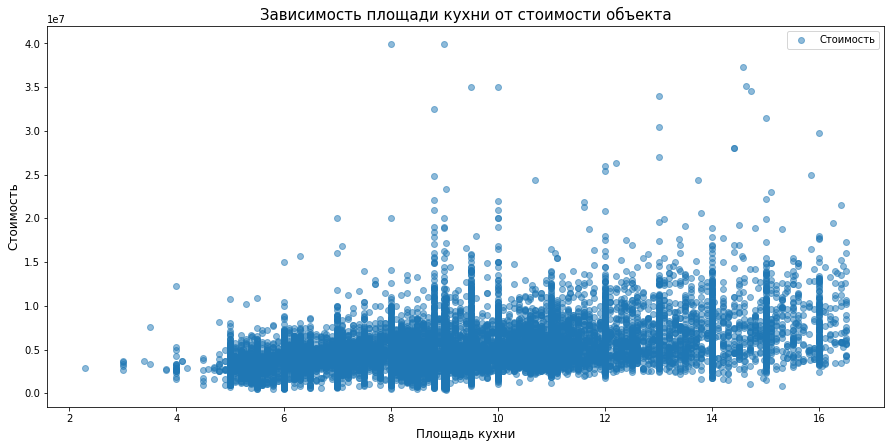

In [44]:
# Найдем зависимость по площади кухни
df.plot(x='kitchen_area', y='last_price', style='o', alpha=0.5, figsize=(15, 7), label="Стоимость")
plt.title('Зависимость площади кухни от стоимости объекта', fontsize = 15)
plt.xlabel('Площадь кухни', fontsize = 12)
plt.ylabel('Стоимость', fontsize = 12)
plt.show()

In [45]:
# Построим матрицу корреляции
stat_multi = df.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area'])
stat_multi.corr()

,kitchen_area,living_area,total_area
kitchen_area,1.000000,0.363550,0.557758
living_area,0.363550,1.000000,0.929563
total_area,0.557758,0.929563,1.000000


**Вывод:** Из таблицы коррелиации видна зависимость между жилой площадью и общей площадью. Площадь кухни плохо коррелирует и площадью недвижимости. Скорее всего это происходит из-за того, что площадь жилая/общая существенно растет с увеличением кол-ва комнат.

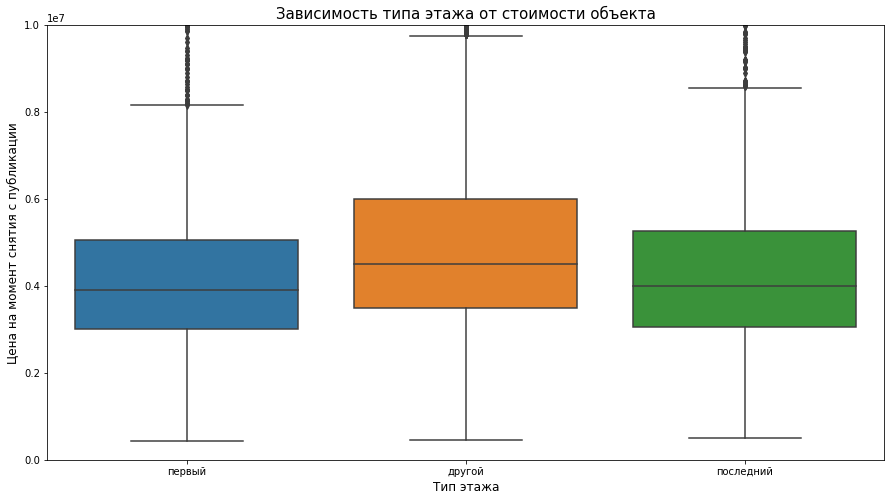

In [46]:
# Найдем зависимость по типу этажа
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='floor_type', y='last_price')
plt.ylim(0, 10000000)
plt.title('Зависимость типа этажа от стоимости объекта', fontsize = 15)
plt.xlabel('Тип этажа', fontsize = 12)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

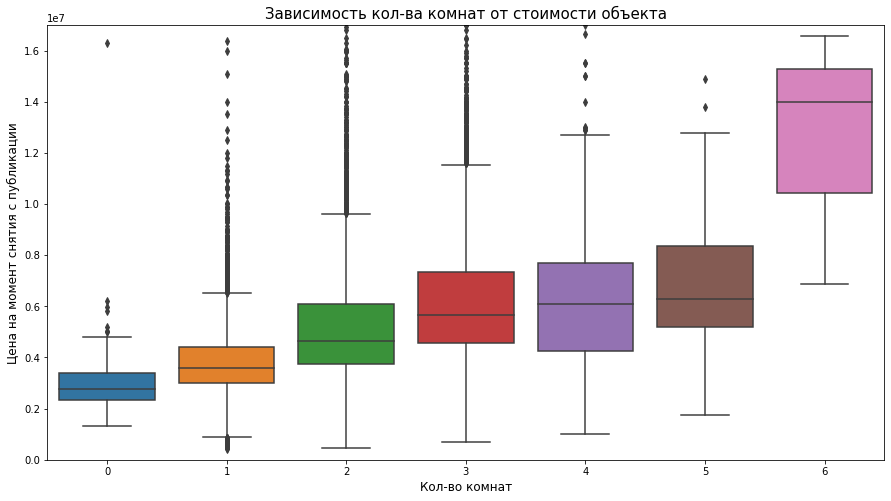

In [47]:
# Найдем зависимость по кол-ву комнат
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='rooms', y='last_price')
plt.ylim(0, 17000000)
plt.title('Зависимость кол-ва комнат от стоимости объекта', fontsize = 15)
plt.xlabel('Кол-во комнат', fontsize = 12)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

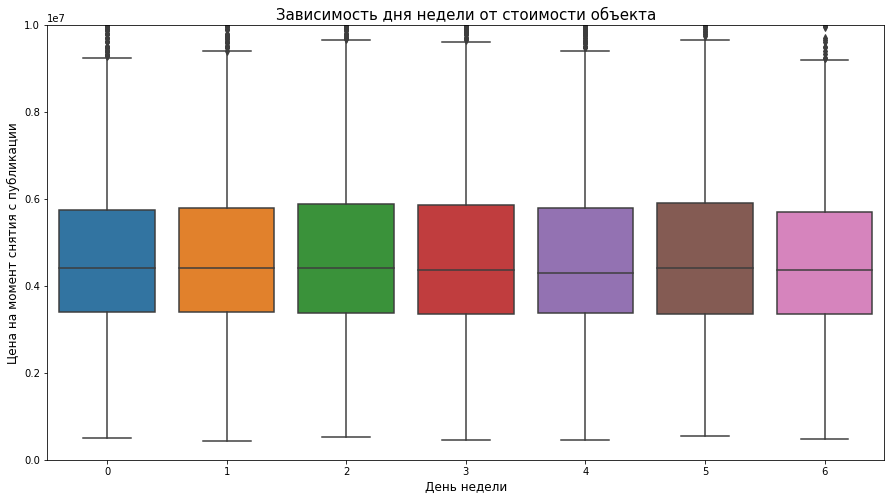

In [48]:
# Найдем зависимость по дню недели
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='weekday', y='last_price')
plt.ylim(0, 10000000)
plt.title('Зависимость дня недели от стоимости объекта', fontsize = 15)
plt.xlabel('День недели', fontsize = 12)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

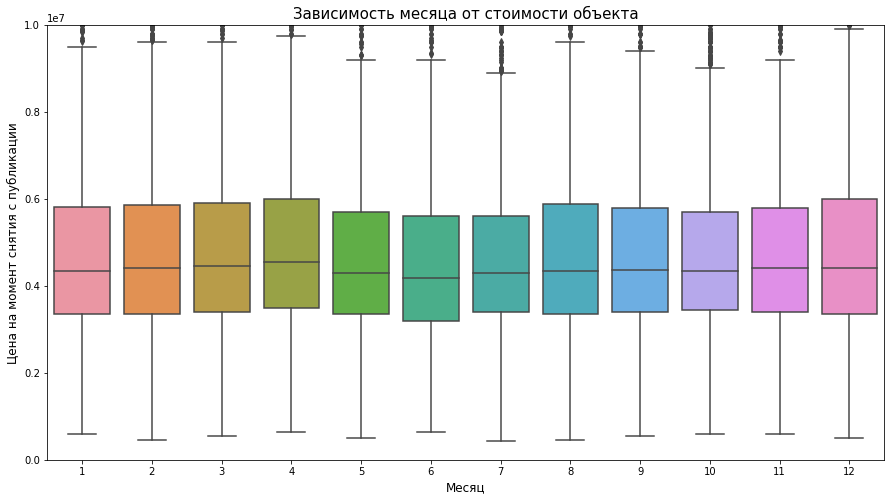

In [49]:
# Найдем зависимость по месяцу
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='month', y='last_price')
plt.ylim(0, 10000000)
plt.title('Зависимость месяца от стоимости объекта', fontsize = 15)
plt.xlabel('Месяц', fontsize = 12)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

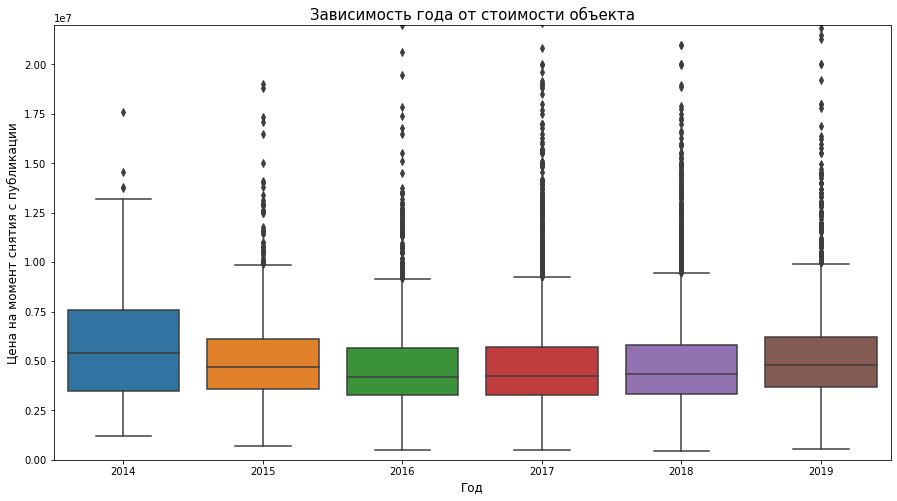

In [50]:
# Найдем зависимость по году
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='year', y='last_price')
plt.ylim(0, 22000000)
plt.title('Зависимость года от стоимости объекта', fontsize = 15)
plt.xlabel('Год', fontsize = 12)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

**Вывод:** По графикам выше не выявленно никих аномалий. 
- Можно отметить зависимость цены по годам. в 2014 году был "отрицательный рост" экономики, что сопровождалось ростом цен на недвижимость, поэтому диапазон цен был больше всех последующих годов, включая 2019 г. 
- По месяцам в целом все стабильно, за исключением лета, виден небольшой спад цены.     
- Дни недели имеют стабильные показатели.   
- Исходя из зависимости цены к кол-ву комнат можно увидеть, что с ростом комнат - растет цена и ее диапазон. (что логично)  
- Первый и последний этаж как правило дешевле основных.

##### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [51]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
top_ten = df['locality_name'].value_counts().head(10)
locality_pivot = df.query('locality_name in @top_ten.index').pivot_table(
    index = 'locality_name', values = 'price_area', aggfunc='median')
locality_pivot.sort_values(by='price_area', ascending=False).astype(int)

,price_area
locality_name,
Санкт-Петербург,102534
Пушкин,97349
Парголово,92330
Кудрово,92225
Мурино,85878
Шушары,76584
Колпино,74722
Гатчина,68429
Всеволожск,65789


**Вывод:** Видна зависимость стоимости кв м по отношению к центру города. Чем ближе к центру - тем дороже. Санкт-Петербург - имеет максимальную цену стоимости м2, Самую низкую из топ 10 - Выборг. In fact: от Выборга гораздо ближе до границе с Финляндией, чем до Санкт-Петербурга)

##### Вычислим среднюю цену каждого километра

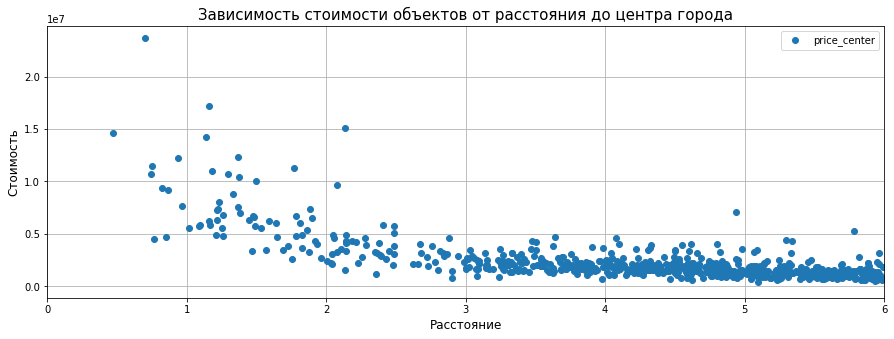

In [52]:
# Найдем зависимость стоимости объектов от расстояния до центра города.
df['price_center'] = (df['last_price'] / df['center_km']).round(0)

km_pivot = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='center_km', values='price_center', aggfunc='mean')

km_pivot.plot(style='o', grid=True, xlim=(0,6), figsize=(15, 5), label="Стоимость")
plt.title('Зависимость стоимости объектов от расстояния до центра города', fontsize = 15)
plt.xlabel('Расстояние', fontsize = 12)
plt.ylabel('Стоимость', fontsize = 12)
plt.show()


**Вывод:** После отдаления на 3 км от центра цена за м2 стабилизируется и имеет более узкий диапазон. Можно сделать вывод что в центре города цена имеет сильную волатильность, т.к. имеются эксклюзивные, более дорогие предложения. И, как мы уже отметили ранее, чем ближе к центру - тем выше цена.

#### Общий вывод

**Выводы по ходу исследования:**
#### Ознакомление с данными
- в датасете 23699 строк
- пропуски в столбцах:
 - ceiling_height
 - floors_total
 - living_area
 - is_apartment 
 - kitchen_area
 - balcony
 - locality_name
 - airports_nearest
 - cityCenters_nearest
 - parks_around3000
 - parks_nearest
 - ponds_around3000
 - ponds_nearest


#### Предобработка данных
В рамках разброса устранили аномально большие и малые значения. Высота потолков, площадь кухни, площадь квартиры и общее количество этажей имели большой разброс в связи с ошибками в данных. Все скорректированные значения перезаписали в новый датафрейм.

#### Добавление новых столбцов
Добавлены следующие столбцы:
- price_area (Цена одного квадратного метра)
- weekday (День недели публикации объявления)
- month (Месяц публикации объявления)
- year (Год публикации объявления)
- floor_type (Тип этажа квартиры)
- center_km (Расстояние до центра города)


#### Исследовательский анализ данных
##### Изучим параметры объектов:
- Общая площадь - видим пик значений от 25 до 45 м2. Можно сделать вывод, что чаще всего встречаются квартиры студии и 1-2 комнатные.
- Жилая площадь - видим два пика: от 15 до 20 м2 и от 25 до 35 м2. Можем предположить, что это типовые варианты квартир.
- Площадь кухни - видим 2 пика в значениях площади кухни. 4-7 м2 и 8-10 м2. Скорее всего это типовые варианты.
- Цена объекта - пик наблюдается в диапазоне от 3 до 5 млн рублей. Это самые ходовые квартиры по стоимости.
- Кол-во комнат - самые распространенные - 1-2 комнатные.
- Высота потолков - 2.4 - 2.8 самая распространенная высота потолка, так же видим небольшой всплеск на 3м, скорее всего это бизнес и элит класс.
- Кол-во квартир по этажу - самые распространенные этажи - начиная снизу. Можно предположить, что по мере увеличения этажа растет и цена.
- Тип этажа - кол-во первых и последних этажей примерно одинаково.
- Кол-во этажей в доме - пики на 5, 9, 14 и 16 этажах. Это типовые застройки. Лидеры - 5-и этажки.
- Расстояние до центра города - наиболее удобное заселенное место находится в диапазоне от 8 до 15 км от центра.
- Расстояние до аэропорта - аэропорт находится около города, поэтому видим схожую ситуацию. Можно заметить второй пик около 40 км. Скорее всего это густонаселённая окраина СЗ и СВ Санкт-Петербурга.
- Расстояние до ближайшего парка - как правило, парки раскиданы по всему городу, и средняя удаленность вышла в диапазоне от 400 до 600 м2.
- День публикации объявления - пики продаж выходят на будние дни. Логично что на выходных риелторы больше отдыхают.
- Месяц публикации объявления - пик продаж вышел на 2017 - 2018 гг. В 2019 сделки вернулись на уровень 2016 г.

##### Как быстро продавались квартиры
В целом мы видим нисходящую тенденцию по времени. Продажи до 3 месяцев можно считать быстрыми, а продажи более - долгими. Скорее всего первыми уходят типовые квартиры, более 3 месяцев продаются квартиры с нестандартной планировкой.

##### Факторы, которые больше всего влияют на общую (полную) стоимость объекта
- Видна зависимость между жилой площадью и общей площадью. Площадь кухни плохо коррелирует и площадью недвижимости. Скорее всего это происходит из-за того, что площадь жилая/общая существенно растет с увеличением кол-ва комнат.
- Можно отметить зависимость цены по годам. в 2014 году был "отрицательный рост" экономики, что сопровождалось ростом цен на недвижимость, поэтому диапазон цен был больше всех последующих годов, включая 2019 г. 
- По месяцам в целом все стабильно, за исключением лета, виден небольшой спад цены.     
- Дни недели имеют стабильные показатели.   
- Исходя из зависимости цены к кол-ву комнат можно увидеть, что с ростом комнат - растет цена и ее диапазон. (что логично)  
- Первый и последний этаж как правило дешевле основных.

##### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Видна зависимость стоимости кв м по отношению к центру города. Чем ближе к центру - тем дороже. Санкт-Петербург - имеет максимальную цену стоимости м2, Самую низкую из топ 10 - Выборг. In fact: от Выборга гораздо ближе до границе с Финляндией, чем до Санкт-Петербурга)

##### Средняя цена каждого километра
После отдаления на 3 км от центра цена за м2 стабилизируется и имеет более узкий диапазон. Можно сделать вывод что в центре города цена имеет сильную волатильность, т.к. имеются эксклюзивные, более дорогие предложения. И, как мы уже отметили ранее, чем ближе к центру - тем выше цена.


Проанализировав датасет можно уверенно сказать что наибольший спрос имеют квартиры с 1, 2 комнатами / студии, 35 - 50 м2 в диапазоне от 8 до 15 км от центра города (в спальных р-нах). Наибольшем спросом пользуются первые этажи, т.к. цена на них - дешевле. Дома представляют собой типовую застройку 5, 9, 14 и 16 этажей со стандартной высотой потолков. Стоимость данных квартир составляла 3 - 5 млн. рублей. Данное описание является типичным выбором среднестатистического покупателя. Стоит обратить внимание на отклонения от вышеуказанных параметров в данном сегменте, т.к. большая дисперсия не типична для данного типа недвижимости.

В центре ситуация иная. Чем ближе к центру, тем выше цена. За счет данной зависимости растет диапазон предложений. Большие отклонения в цене - свойственно для недвижимости в данном сегменте. Стоит отметить, что предложения заметно ниже, чем в спальных районах, что дополнительно влияет на рост стоимости недвижимости.

---

**Рекомендации:**
Недвижимость в центре (бизнес-класс и элит) более конкурентноспособная, т.к. предложения заметно меньше, чем в стандартной застройке (эконом и комфорт класса). Разброс цен гораздо шире и сами цены выше, что в целом, создает маневры для идейного творчества. Есть возможность заложить большую маржу. Но важно учитывать время продажи, которое составляет в среднем от 3 месяцев и более. Стоит обратить внимание на этажность: первый и последний этаж, как правило не "ходовой", хотя в данном сегменте могут быть исключения, например квартиры с террасой на последнем этаже или выход на газон, в случае с первым этажом. В данном сегменте я бы рекомендовал изучить потребности и увлечения своих потенциальных покупателей для привлечения их внимания и удовлетворения потребностей. Можно заложить в проект жк возможность посещения большого тенниса или создать поле для мини-Гольфа, бассейна (условные примеры). Так же можно дополнительно построить школу или детский сад на территории жк, для удобства жильцов. Так же можно увеличить кол-во квартир с большей площадью и кол-вом комнат, т.к. в данном сегменте покупательская способность позволяет это реализовать. 

В типовой застройке гораздо больше предложения, соответственно больше конкуренция. Будет большим преимуществом дать покупателям выгодное предложение в виде скидки или подарка в виде кладовой (например), а также, делать акцент на преимуществах продаваемого комплекса, например двор без машин или хорошая инфраструктура вблизи комплекса. Как уже упоминалось ранее, для данного сегмента не типичен разброс цен, поэтому стоит уделить большое внимание экономической составляющей: правильно рассчитать маркетинг, закладываемую маржу и внимательно проанализировать конкурентов, для понимания своих сильных или потенциально сильных сторон.

Сезонных/недельных корреляций в целом не наблюдается.
